In [1]:
!ls ../experiments/logs

arch_evals	    difficulty	   lr_sweep_llama     new_lr_sweep_llama
arch_sweep	    hyena_start    misc		      new_lr_sweep_nodrop
arch_sweep_new	    lr_sweep	   new_lr_sweep
arch_sweep_unambig  lr_sweep_gpt2  new_lr_sweep_gpt2


In [2]:
import glob
import os
import pandas as pd
import plotnine as p9
from tqdm import tqdm

In [29]:
dfs = []
for file in tqdm(list(glob.glob("../experiments/logs/difficulty/**/test/SummaryEvaluator.csv")) + list(glob.glob("../experiments/logs/difficulty/**/test/InterchangeEvaluator.csv"))):
    evaluator = file.split("/")[-1].split(".")[0]
    ablation, val, lr = os.path.dirname(file).split("/")[-2].split(".")[0].split("___")
    log = pd.read_csv(file)
    log["identifier"] = file
    log["ablation"] = ablation
    log["ablation_val"] = int(val)
    log["lr"] = float(lr)
    log["evaluator"] = evaluator
    log["step_rel"] = log["step"] / log["step"].max()
    log["layers"] = 2
    log = log.groupby(["variable", "step", "evaluator", "step_rel", "identifier", "ablation", "ablation_val", "lr", "layers"]).mean().reset_index()
    dfs.append(log)
print(len(dfs))
df = pd.concat(dfs)
df = df.groupby(["variable", "step", "evaluator", "step_rel", "identifier", "ablation", "ablation_val", "lr", "layers"]).mean().reset_index()
df

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:31<00:00,  3.55it/s]


112


,variable,step,evaluator,step_rel,identifier,ablation,ablation_val,lr,layers,value
0,0.PARENT.query_item_orig.divider.attention_inp...,0,InterchangeEvaluator,0.0,../experiments/logs/difficulty/max_depth___20_...,max_depth,20,0.01000,2,0.000000
1,0.PARENT.query_item_orig.divider.attention_inp...,0,InterchangeEvaluator,0.0,../experiments/logs/difficulty/max_depth___20_...,max_depth,20,0.00100,2,0.000000
2,0.PARENT.query_item_orig.divider.attention_inp...,0,InterchangeEvaluator,0.0,../experiments/logs/difficulty/max_depth___20_...,max_depth,20,0.00010,2,0.000000
3,0.PARENT.query_item_orig.divider.attention_inp...,0,InterchangeEvaluator,0.0,../experiments/logs/difficulty/max_depth___20_...,max_depth,20,0.00001,2,0.000000
4,0.PARENT.query_item_orig.divider.attention_inp...,0,InterchangeEvaluator,0.0,../experiments/logs/difficulty/max_depth___20_...,max_depth,20,0.00300,2,0.000000
...,...,...,...,...,...,...,...,...,...,...
2337491,query_item.pred_prob,50000,SummaryEvaluator,1.0,../experiments/logs/difficulty/num_terminals__...,num_terminals,80,0.00010,2,0.757076
2337492,query_item.pred_prob,50000,SummaryEvaluator,1.0,../experiments/logs/difficulty/num_terminals__...,num_terminals,80,0.00001,2,0.194026
2337493,query_item.pred_prob,50000,SummaryEvaluator,1.0,../experiments/logs/difficulty/num_terminals__...,num_terminals,80,0.00300,2,0.530386
2337494,query_item.pred_prob,50000,SummaryEvaluator,1.0,../experiments/logs/difficulty/num_terminals__...,num_terminals,80,0.00030,2,0.802081


/juice2/scr2/aryaman/tinylang/.venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


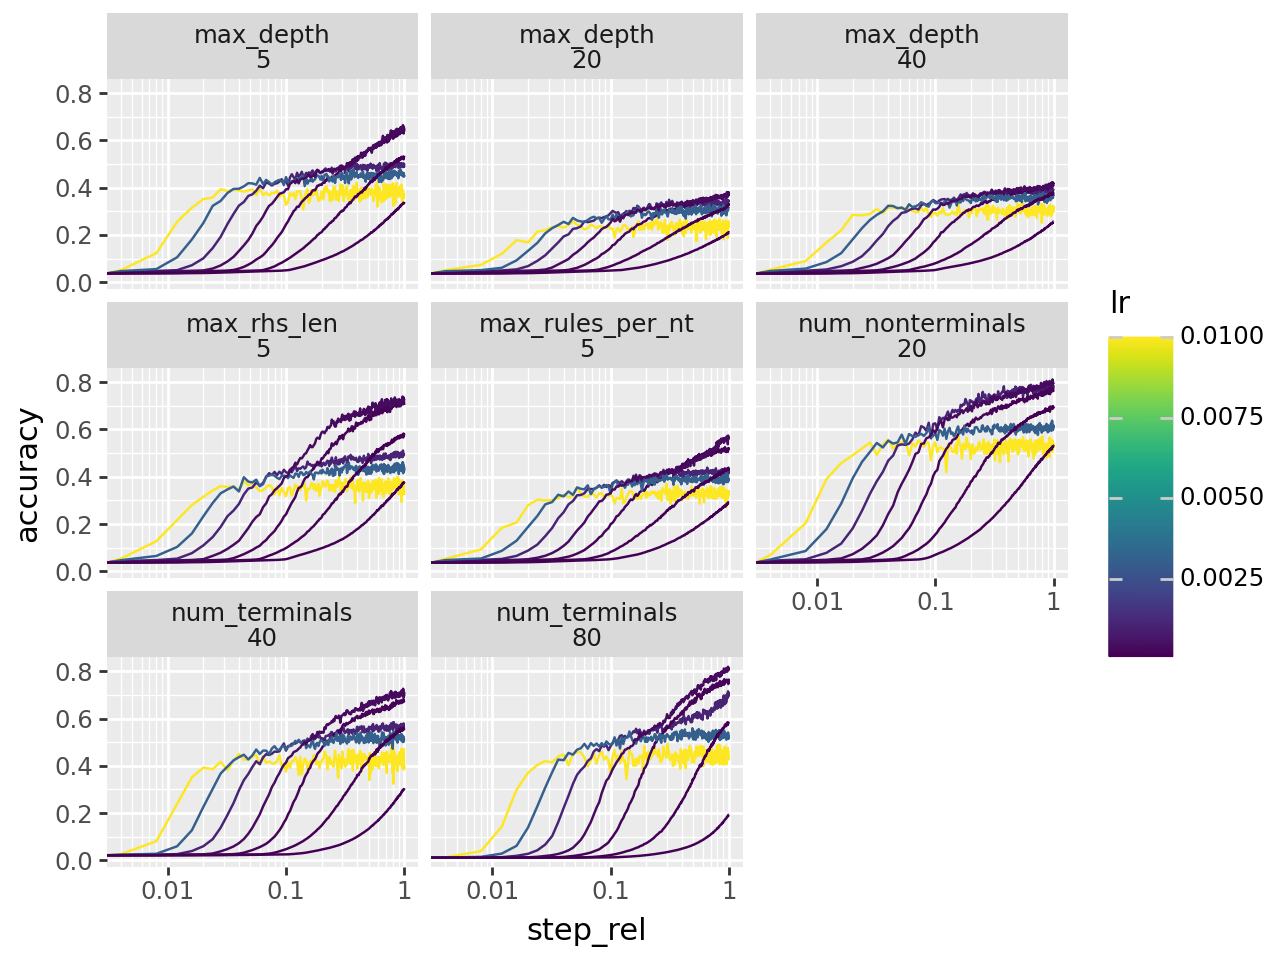

In [30]:
subset_df = df[df["variable"] == "query_item.pred_prob"]
plot = (
    p9.ggplot(subset_df, p9.aes(x="step_rel", y="value", color="lr", group="identifier")) +
    p9.geom_line() +
    p9.facet_wrap("~ablation + ablation_val") +
    p9.scale_x_log10() +
    # p9.scale_color_gradient(low="blue", high="red") +
    p9.labs(y="accuracy")
)
plot.show()

/juice2/scr2/aryaman/tinylang/.venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


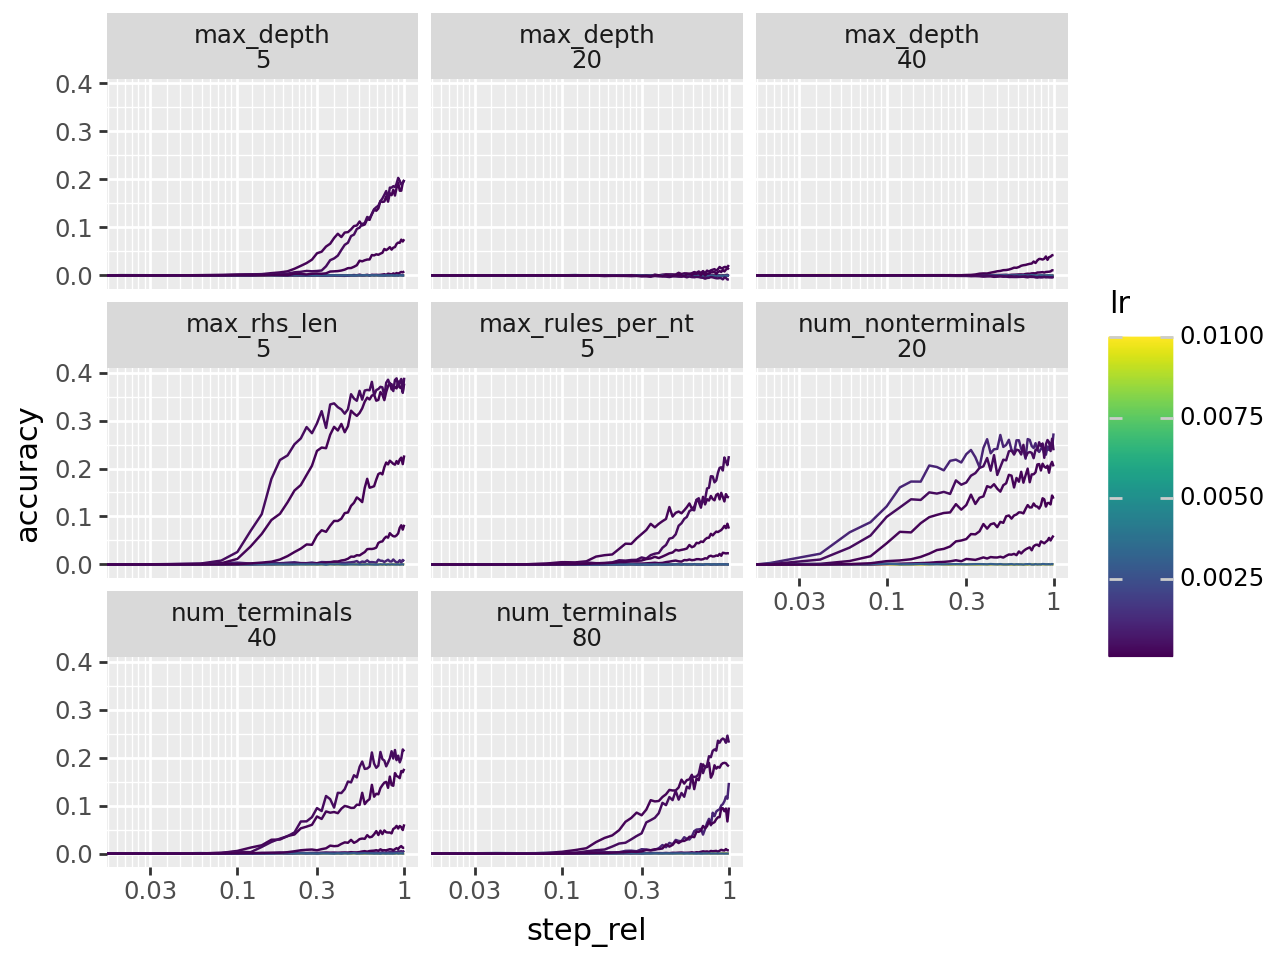

In [31]:
# eval/InterchangeEvaluator/1.PARENT.query_item_orig.target_item_orig.block_input.prob_diff and model.config.n_embd v. eval/SummaryEvaluator/query_item.pred_prob
subset_df = df[df["variable"] == "1.PARENT.query_item_orig.target_item_orig.block_input.prob_diff"]
plot = (
    p9.ggplot(subset_df, p9.aes(x="step_rel", y="value", color="lr", group="identifier")) +
    p9.geom_line() +
    p9.facet_wrap("~ablation + ablation_val") +
    p9.scale_x_log10() +
    # p9.scale_color_gradient(low="blue", high="red") +
    p9.labs(y="accuracy")
)
plot.show()

['step_rel', 'lr', 'ablation', 'ablation_val', '1.PARENT.query_item_orig.target_item_orig.block_input.prob_diff', 'query_item.pred_prob', 'identifier']
2856


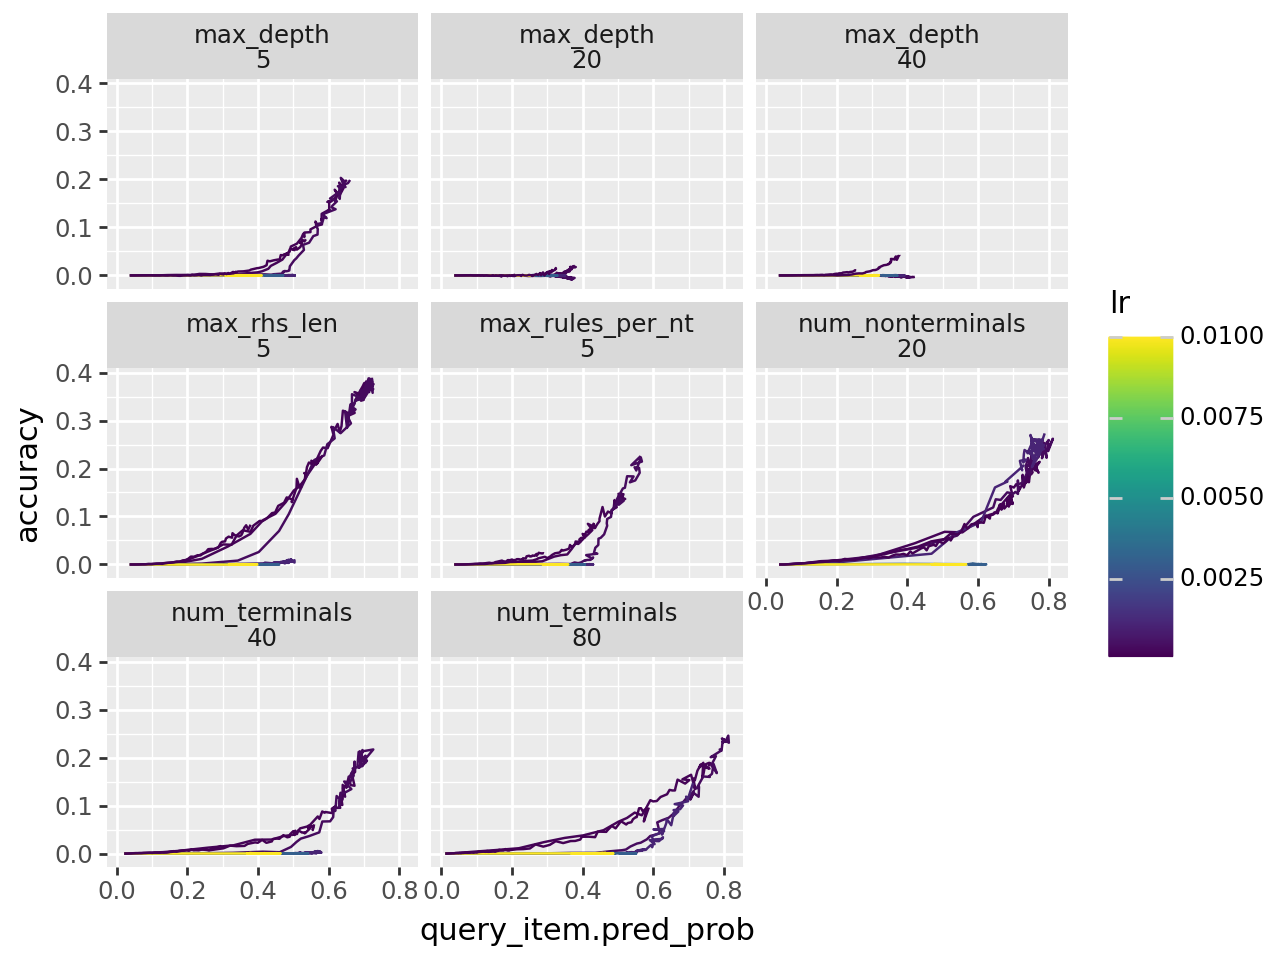

In [79]:
# eval/InterchangeEvaluator/1.PARENT.query_item_orig.target_item_orig.block_input.prob_diff and model.config.n_embd v. eval/SummaryEvaluator/query_item.pred_prob
subset_df = df[df["variable"].isin(["1.PARENT.query_item_orig.target_item_orig.block_input.prob_diff", "query_item.pred_prob"])]
subset_df = subset_df.pivot(index=["step_rel", "lr", "ablation", "ablation_val"], columns="variable", values="value").reset_index()
subset_df["identifier"] = subset_df["lr"].apply(lambda x: str(x))
# subset_df["lr"] = subset_df["lr"].astype(str)
subset_df = subset_df.sort_values(by=["identifier", "step_rel"]).dropna()
# print(subset_df.head())
print(list(subset_df.columns))
print(len(subset_df))
# print(subset_df)
plot = (
    p9.ggplot(subset_df, p9.aes(x="query_item.pred_prob", y="1.PARENT.query_item_orig.target_item_orig.block_input.prob_diff", color="lr", group="identifier")) +
    p9.geom_path() +
    p9.facet_wrap("~ablation + ablation_val") +
    # p9.scale_x_log10() +
    # p9.scale_color_gradient(low="blue", high="red") +
    p9.labs(y="accuracy")
)
plot.show()


['step_rel', 'lr', 'ablation', 'ablation_val', '0.PARENT.target_item_orig.target_item_orig.attention_input.logit_diff', '1.PARENT.query_item_orig.target_item_orig.attention_input.logit_diff', 'identifier']
2856


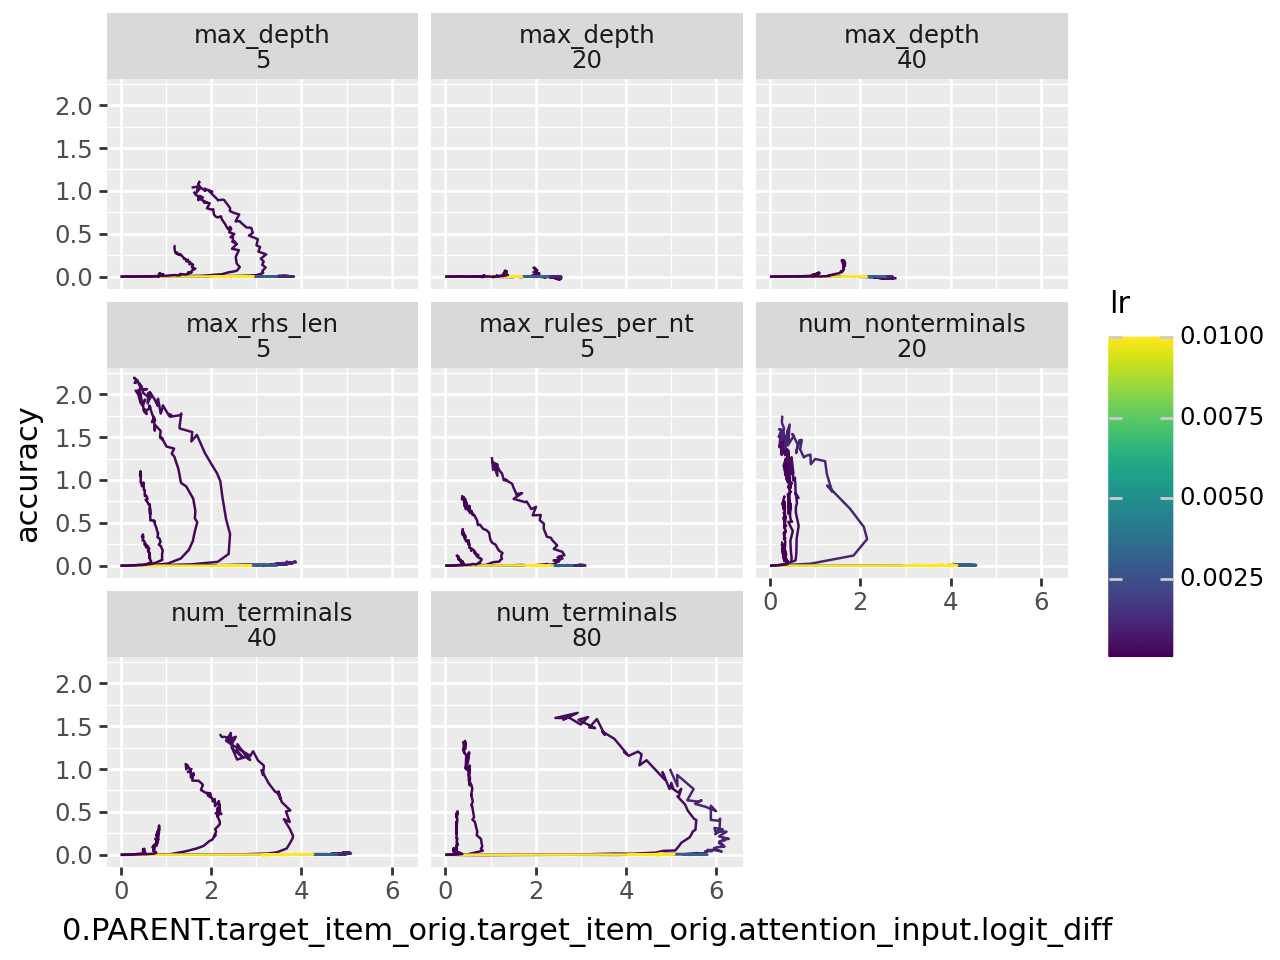

In [112]:
# eval/InterchangeEvaluator/1.PARENT.query_item_orig.target_item_orig.block_input.prob_diff and model.config.n_embd v. eval/SummaryEvaluator/query_item.pred_prob
subset_df = df[df["variable"].isin(["1.PARENT.query_item_orig.target_item_orig.attention_input.logit_diff", "0.PARENT.target_item_orig.target_item_orig.attention_input.logit_diff"])]
subset_df = subset_df.pivot(index=["step_rel", "lr", "ablation", "ablation_val"], columns="variable", values="value").reset_index()
subset_df["identifier"] = subset_df["lr"].apply(lambda x: str(x))
# subset_df["lr"] = subset_df["lr"].astype(str)
subset_df = subset_df.sort_values(by=["identifier", "step_rel"]).dropna()
# print(subset_df.head())
print(list(subset_df.columns))
print(len(subset_df))
# print(subset_df)
plot = (
    p9.ggplot(subset_df, p9.aes(x="0.PARENT.target_item_orig.target_item_orig.attention_input.logit_diff", y="1.PARENT.query_item_orig.target_item_orig.attention_input.logit_diff", color="lr", group="identifier")) +
    p9.geom_path() +
    p9.facet_wrap("~ablation + ablation_val") +
    # p9.scale_x_log10() +
    # p9.scale_color_gradient(low="blue", high="red") +
    p9.labs(y="accuracy")
)
plot.show()


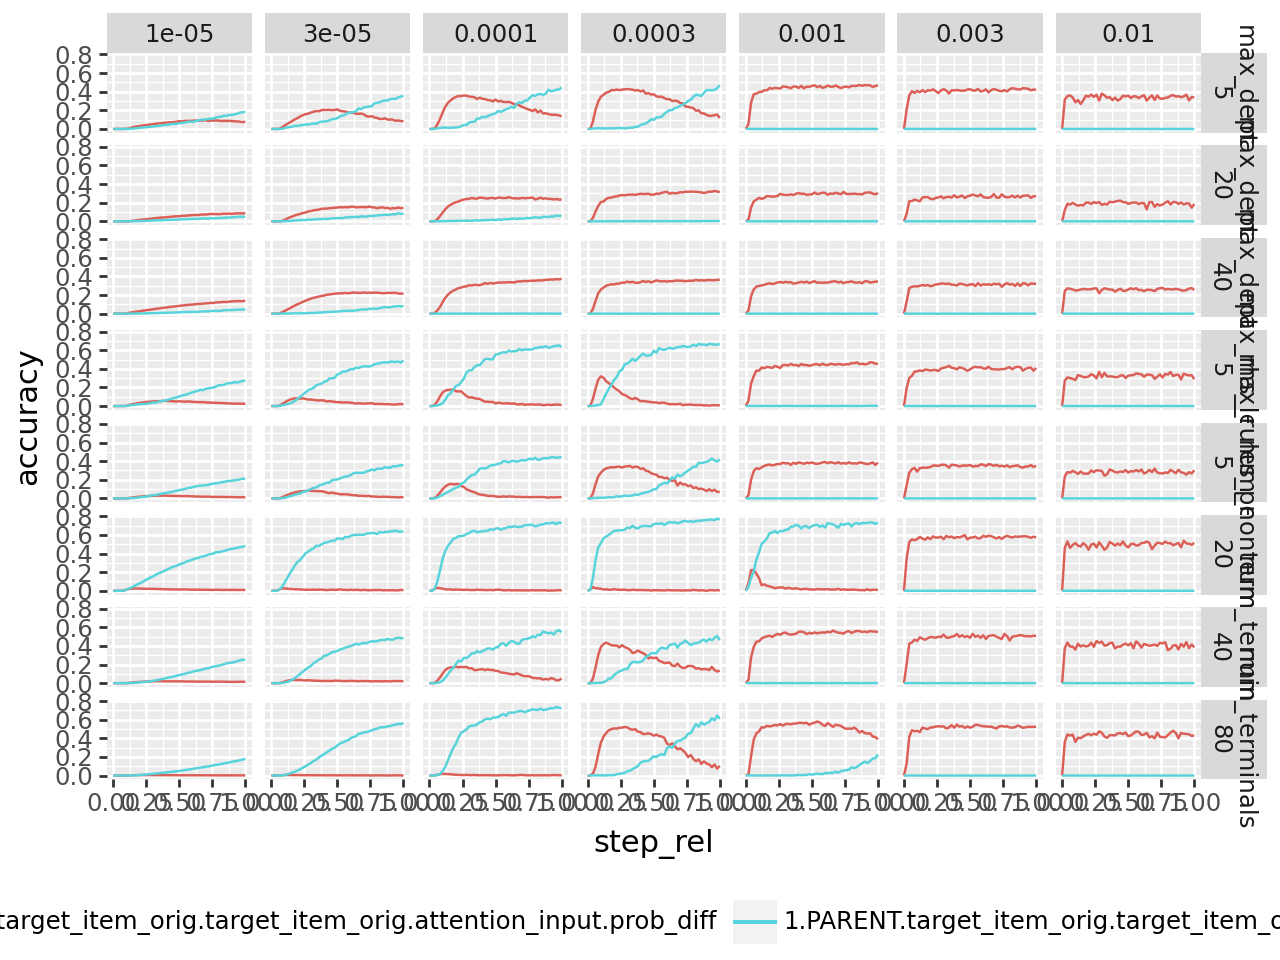

In [110]:
# eval/InterchangeEvaluator/1.PARENT.query_item_orig.target_item_orig.block_input.prob_diff and model.config.n_embd v. eval/SummaryEvaluator/query_item.pred_prob
subset_df = df[df["variable"].isin([
    "0.PARENT.target_item_orig.target_item_orig.attention_input.prob_diff",
    "1.PARENT.target_item_orig.target_item_orig.attention_input.prob_diff"
])]
plot = (
    p9.ggplot(subset_df, p9.aes(x="step_rel", y="value", color="variable", group="variable")) +
    p9.geom_line() +
    p9.facet_grid("ablation + ablation_val~lr") +
    # p9.scale_x_log10() +
    # p9.scale_color_gradient(low="blue", high="red") +
    p9.labs(y="accuracy") +
    p9.theme(legend_position="bottom")
)
plot.show()

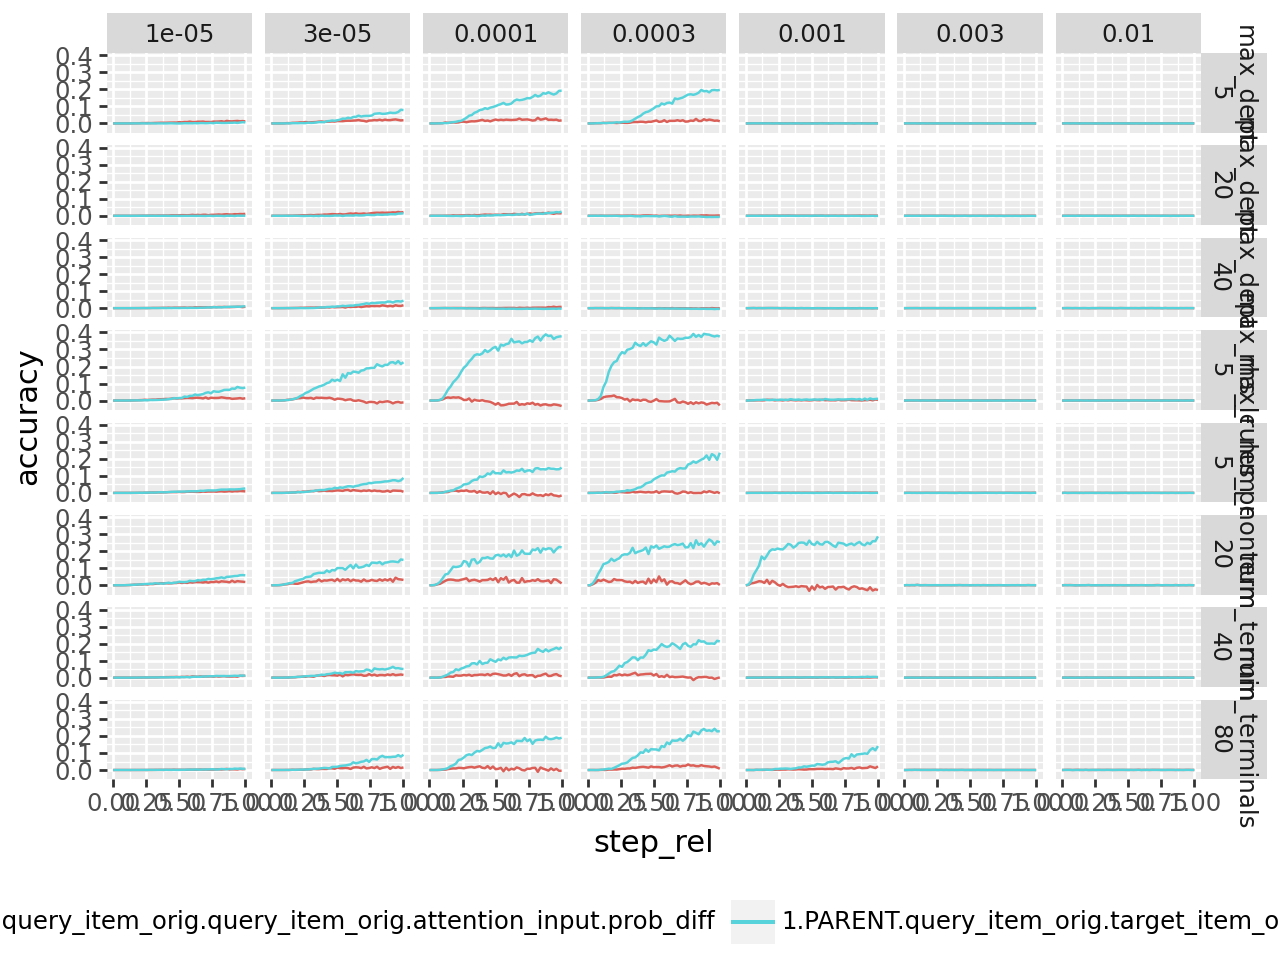

In [106]:
# eval/InterchangeEvaluator/1.PARENT.query_item_orig.target_item_orig.block_input.prob_diff and model.config.n_embd v. eval/SummaryEvaluator/query_item.pred_prob
subset_df = df[df["variable"].isin([
    "1.PARENT.query_item_orig.query_item_orig.attention_input.prob_diff",
    "1.PARENT.query_item_orig.target_item_orig.attention_input.prob_diff"
])]
plot = (
    p9.ggplot(subset_df, p9.aes(x="step_rel", y="value", color="variable", group="variable")) +
    p9.geom_line() +
    p9.facet_grid("ablation + ablation_val~lr") +
    # p9.scale_x_log10() +
    # p9.scale_color_gradient(low="blue", high="red") +
    p9.labs(y="accuracy") +
    p9.theme(legend_position="bottom")
)
plot.show()